In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns
import eli5

In [3]:
from utils import load_and_fillna, pca_prep, run_random_forest

In [4]:
from sklearn.model_selection import train_test_split
def extract_features(df):
    features = list(df.columns[:-1])
    y = df['Target']
    X = df[features]
    return X,y

def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
    return X_train, X_test, y_train, y_test

In [5]:
LUAD_CNV = pd.read_pickle("data/LUAD_CNV.pkl")
LUSC_CNV = pd.read_pickle("data/LUSC_CNV.pkl")

In [5]:
LUAD_CNV.shape
LUSC_CNV.shape

(525, 19729)

In [14]:
LUAD_CNV.describe()

Gene Symbol,ENSG00000008128.21,ENSG00000008130.14,ENSG00000067606.14,ENSG00000078369.16,ENSG00000078808.15,ENSG00000107404.16,ENSG00000116151.12,ENSG00000127054.17,ENSG00000131584.17,ENSG00000131591.16,...,ENSG00000268651.2,ENSG00000274183.1,ENSG00000274791.1,ENSG00000277150.1,ENSG00000277203.1,ENSG00000277745.1,ENSG00000277858.1,ENSG00000124333.13,ENSG00000124334.15,ENSG00000168939.9
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,...,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,0.021583,0.023381,0.025180,0.026978,0.028777,0.030576,0.032374,0.034173,0.035971,0.037770,...,35.562950,35.564748,35.566547,35.568345,35.570144,35.571942,35.573741,35.571942,35.573741,35.575540
std,0.364509,0.366862,0.374039,0.385772,0.401662,0.421238,0.444014,0.469523,0.497345,0.527115,...,836.267823,836.310232,836.352642,836.395051,836.437461,836.479870,836.522280,836.564838,836.607247,836.649657
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,19719.000000,19720.000000,19721.000000,19722.000000,19723.000000,19724.000000,19725.000000,19726.000000,19727.000000,19728.000000


In [6]:
LUAD_CNV["Target"] = 1
LUSC_CNV["Target"] = 2
df = pd.concat([LUAD_CNV,LUSC_CNV])

In [17]:
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold()
df_variance = thresholder.fit_transform(df)
df_variance.shape

(1081, 19730)

In [7]:
X, y = extract_features(df)
X_train, X_test, y_train, y_test = split_data(X, y)
feature_names = list(X.columns)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("LR Accuracy: ", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Accuracy:  0.7788018433179723


In [7]:
principalCompLUAD = pca_prep(LUAD_CNV, 5)
principalCompLUSC = pca_prep(LUSC_CNV, 5)
principalCompLUAD['Target'] = '0'
principalCompLUSC['Target'] = '1'
lungCNV = pd.concat([principalCompLUAD,principalCompLUSC])

In [8]:
X, y = extract_features(lungCNV)
X_train, X_test, y_train, y_test = split_data(X, y)
feature_names = list(X.columns)

In [11]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("SVM Accuracy: ", accuracy_score(y_test, y_pred))

SVM Accuracy:  0.5


In [6]:
LUAD = pd.read_pickle("data/LUAD.pkl")
LUSC = pd.read_pickle("data/LUSC.pkl")

In [7]:
princCompLUAD = pca_prep(LUAD, 5)
princCompLUSC = pca_prep(LUSC, 5)
princCompLUAD['Target'] = '0'
princCompLUSC['Target'] = '1'
lungGE = pd.concat([princCompLUAD,princCompLUSC])

Training Features Shape: (8, 19729)
Training Labels Shape: (8,)
Testing Features Shape: (2, 19729)
Testing Labels Shape: (2,)
Index(['PC-1', 'PC-1', 'PC-3', 'PC-3', 'PC-5', 'PC-5', 'PC-4', 'PC-2'], dtype='object')
Training the model


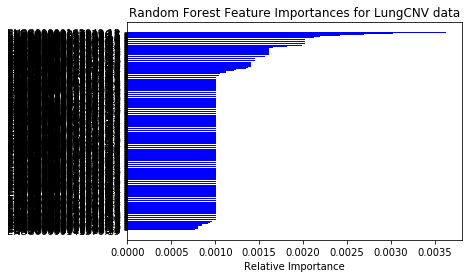

Top 500 features: ['ENSG00000162949.15', 'ENSG00000157916.17', 'ENSG00000270136.4', 'ENSG00000159423.15', 'ENSG00000205090.7', 'ENSG00000088280.17', 'ENSG00000115657.11', 'ENSG00000279244.1', 'ENSG00000118197.12', 'ENSG00000173372.15', 'ENSG00000053372.4', 'ENSG00000169991.9', 'ENSG00000204219.8', 'ENSG00000184163.3', 'ENSG00000117640.16', 'ENSG00000177674.14', 'ENSG00000196581.9', 'ENSG00000048707.12', 'ENSG00000227868.5', 'ENSG00000118960.11', 'ENSG00000187600.11', 'ENSG00000204464.6', 'ENSG00000055070.15', 'ENSG00000068912.12', 'ENSG00000154429.9', 'ENSG00000011523.12', 'ENSG00000138069.15', 'ENSG00000204624.7', 'ENSG00000173436.12', 'ENSG00000214336.4', 'ENSG00000171824.12', 'ENSG00000130255.11', 'ENSG00000237847.2', 'ENSG00000049247.12', 'ENSG00000174792.9', 'ENSG00000197880.7', 'ENSG00000116237.14', 'ENSG00000184908.16', 'ENSG00000255054.3', 'ENSG00000116752.5', 'ENSG00000186510.10', 'ENSG00000078140.12', 'ENSG00000169679.13', 'ENSG00000164574.14', 'ENSG00000125551.17', 'ENSG0000

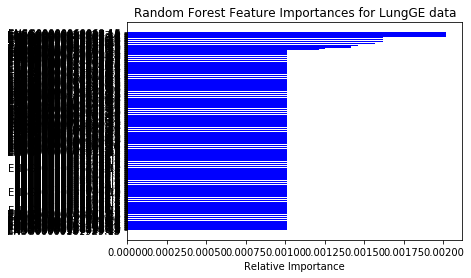

Top 500 features: ['ENSG00000060069.15', 'ENSG00000001497.15', 'ENSG00000011007.11', 'ENSG00000109814.10', 'ENSG00000162377.5', 'ENSG00000022976.14', 'ENSG00000186862.16', 'ENSG00000087460.22', 'ENSG00000006747.13', 'ENSG00000070081.14', 'ENSG00000214248.2', 'ENSG00000242770.2', 'ENSG00000011600.10', 'ENSG00000179520.9', 'ENSG00000032742.16', 'ENSG00000197702.10', 'ENSG00000138399.16', 'ENSG00000163734.4', 'ENSG00000110090.11', 'ENSG00000036473.6', 'ENSG00000006327.12', 'ENSG00000154930.13', 'ENSG00000073605.17', 'ENSG00000042493.14', 'ENSG00000066230.9', 'ENSG00000196289.6', 'ENSG00000108055.9', 'ENSG00000100884.8', 'ENSG00000180447.6', 'ENSG00000076650.5', 'ENSG00000066379.13', 'ENSG00000251884.1', 'ENSG00000082497.10', 'ENSG00000013288.7', 'ENSG00000000003.13', 'ENSG00000011052.20', 'ENSG00000068489.11', 'ENSG00000060339.12', 'ENSG00000059145.17', 'ENSG00000049249.7', 'ENSG00000071462.10', 'ENSG00000000457.12', 'ENSG00000213386.3', 'ENSG00000168992.4', 'ENSG00000269220.1', 'ENSG0000

In [11]:
lungCNV_import = run_random_forest(df=lungCNV, random_state=42, n_estimators=1000, n_importance=500, name="LungCNV")
lungGE_import = run_random_forest(df=lungGE, random_state=42, n_estimators=1000, n_importance=500, name="LungGE")

In [64]:
num_features = [30, 50, 100, 150, 300]
# num_features = [30, 50, 100, 150, 200, 300, 400, 500]
for n in num_features:
    intersect = set(lungCNV_import[:n]).intersection(set(lungGE_import[:n]))
    if len(intersect) >0:
        print("CNV intersection GE : ", intersect)
        break

CNV intersection GE :  {'ENSG00000100099.19', 'ENSG00000049247.12', 'ENSG00000116704.7', 'ENSG00000106331.13'}


# Top 200 features intersect gave: ENSG00000116704.7, ENSG00000100099.19. Top 300 gave these additions: ENSG00000049247.12, ENSG00000106331.13

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
features = list(lungCNV.columns[:-1])

Y = lungCNV['Target']
X = lungCNV[features]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 42)
randForest = RandomForestClassifier(n_estimators = 1000, random_state = 42)
randForest.fit(Xtrain,Ytrain)

# y_pred = randForest.predict(Xtest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

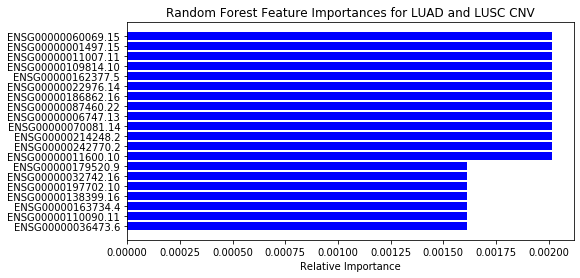

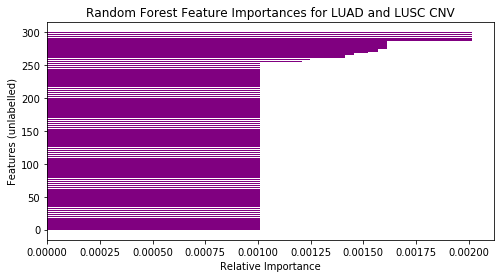

In [9]:
f_import = randForest.feature_importances_
# top 20 features
# last 20 items in the array
sortedIdx1 = np.argsort(f_import)[-20:]  

fig, ax = plt.subplots(figsize=(8,4))
plt.title('Random Forest Feature Importances for LUAD and LUSC CNV')
ax.barh(range(len(sortedIdx1)), f_import[sortedIdx1], color='b', align='center')
plt.yticks(range(len(sortedIdx1)), [features[i] for i in sortedIdx1])
plt.xlabel('Relative Importance')
plt.savefig('LungCNVtop20.png')
plt.show()

indices1 = np.argsort(f_import)[-300:] 
fig, ax = plt.subplots(figsize=(8,4))
plt.title('Random Forest Feature Importances for LUAD and LUSC CNV')
ax.barh(range(len(indices1)), f_import[indices1], color='purple', align='center')
plt.ylabel('Features (unlabelled)')
plt.xlabel('Relative Importance')
plt.savefig('LungCNVAllFeatsImport.png')
plt.show()

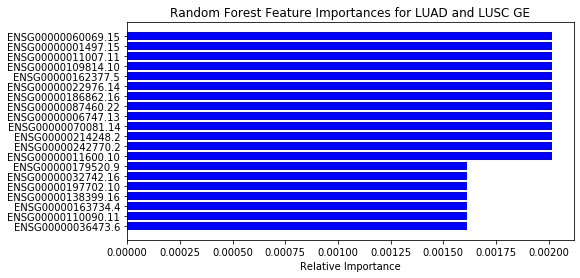

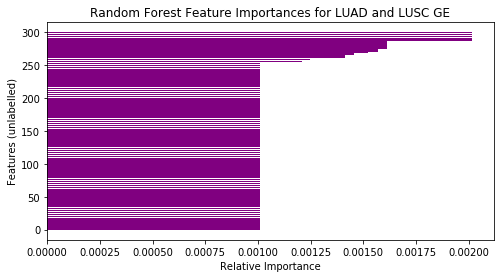

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
features = list(lungGE.columns[:-1])

Y = lungGE['Target']
X = lungGE[features]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 42)
randForest = RandomForestClassifier(n_estimators = 1000, random_state = 42)
randForest.fit(Xtrain,Ytrain)

f_import = randForest.feature_importances_
# top 20 features
# last 20 items in the array
sortedIdx1 = np.argsort(f_import)[-20:]  

fig, ax = plt.subplots(figsize=(8,4))
plt.title('Random Forest Feature Importances for LUAD and LUSC GE')
ax.barh(range(len(sortedIdx1)), f_import[sortedIdx1], color='b', align='center')
plt.yticks(range(len(sortedIdx1)), [features[i] for i in sortedIdx1])
plt.xlabel('Relative Importance')
plt.savefig('LungGEtop20.png')
plt.show()

indices1 = np.argsort(f_import)[-300:] 
fig, ax = plt.subplots(figsize=(8,4))
plt.title('Random Forest Feature Importances for LUAD and LUSC GE')
ax.barh(range(len(indices1)), f_import[indices1], color='purple', align='center')
plt.ylabel('Features (unlabelled)')
plt.xlabel('Relative Importance')
plt.savefig('LungGEAllFeatsImport.png')
plt.show()

In [15]:
X, y = extract_features(lungCNV)
X_train, X_test, y_train, y_test = split_data(X, y)
feature_names = list(X.columns)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
features = list(lungCNV.columns[:-1])

Y = lungCNV['Target']
X = lungCNV[features]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 42)

randForest = RandomForestClassifier(n_estimators = 1000, random_state = 42)

randForest.fit(Xtrain,Ytrain)

y_pred = randForest.predict(Xtest)

print("RandForest Accuracy: ", accuracy_score(Ytest, y_pred))

print("Classification report:\n",
        classification_report(Ytest, y_pred))

RandForest Accuracy:  0.5
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
# Lung CNV test train split
X, y = extract_features(df)
X_train, X_test, y_train, y_test = split_data(X, y)
feature_names = list(X.columns)

In [103]:
# Lung GE test train split
LUAD = pd.read_pickle("data/LUAD.pkl")
LUSC = pd.read_pickle("data/LUSC.pkl")
LUAD["Target"] = 1
LUSC["Target"] = 2
df_GE = pd.concat([LUAD,LUSC])

Xge, yge = extract_features(df_GE)
Xge_train, Xge_test, yge_train, yge_test = split_data(Xge, yge)
feature_names_ge = list(Xge.columns)

In [77]:
import joblib
from os.path import exists
import train
dataname = "LUSCLUAD_CNV"
if not exists(f"models/{dataname}_LR.mdl"):
    train.run_logistic_regression(X_train, X_test, y_train, y_test, dataname)
if not exists(f"models/{dataname}_SVM.mdl"):
    train.run_svm(X_train, X_test, y_train, y_test, dataname)
if not exists(f"models/{dataname}_DT.mdl"):
    train.run_decision_trees(X_train, X_test, y_train, y_test, dataname)
if not exists(f"models/{dataname}_RF.mdl"):
    train.run_random_forest(X_train, X_test, y_train, y_test, dataname)
if not exists(f"models/{dataname}_XGB.mdl"):
    train.run_xgboost(X_train, X_test, y_train, y_test, dataname)

Starting Logistic Regression
{'model__C': 1.5}
0.7719907407407407
Done training, model saved to model/LUSCLUAD_CNV_LR.mdl
Starting SVM
{'model__C': 0.001, 'model__gamma': 0.001}
0.7870370370370371
Done training, model saved to model/LUSCLUAD_CNV_SVM.mdl
Starting Decision Trees
{'model__max_depth': 3, 'model__min_samples_split': 5}
0.7372685185185185
Done training, model saved to model/LUSCLUAD_CNV_DT.mdl
Starting Random Forest
{'model__max_depth': 15, 'model__min_samples_split': 5}
0.7881944444444444
Done training, model saved to model/LUSCLUAD_CNV_RF.mdl
Starting XGBoost


exception calling callback for <Future at 0x162aabc10 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 768, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 834, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 753, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/usr/local/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 543, in apply_async
    future = self._workers.submit(SafeFunction(func))
  File "/usr/local/lib/pyt

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6)}

In [81]:
dataname = "LUSCLUAD_CNV"
rf_model_CNV = joblib.load(f"models/{dataname}_RF.mdl")
lr_model_CNV = joblib.load(f"models/{dataname}_LR.mdl")
dt_model_CNV = joblib.load(f"models/{dataname}_DT.mdl")
svm_model_CNV = joblib.load(f"models/{dataname}_SVM.mdl")
# xgb_model_CNV = joblib.load(f"models/{dataname}_XGB.mdl")

In [106]:
dataname = "LUSCLUAD"
rf_model_GE = joblib.load(f"models/{dataname}_RF.mdl")
lr_model_GE = joblib.load(f"models/{dataname}_LR.mdl")
dt_model_GE = joblib.load(f"models/{dataname}_DT.mdl")
svm_model_GE = joblib.load(f"models/{dataname}_SVM.mdl")
xgb_model_GE = joblib.load(f"models/{dataname}_XGB.mdl")

In [39]:
# x = eli5.explain_weights(rf_model_CNV.named_steps["model"], feature_names=feature_names, top=300)
# features = eli5.format_as_text(x, show= ('targets', 'feature_importances'))
# features.split("/n")

In [40]:
# eli5.show_weights(rf_model.named_steps["model"], feature_names=feature_names_ge, top=300, show=List[‘feature_importances’]) 


In [141]:
# feats = rf_model.named_steps["model"].feature_importances_
# print(feats)

[0.00000000e+00 0.00000000e+00 1.97600880e-05 ... 0.00000000e+00
 0.00000000e+00 3.94243386e-05]


In [142]:
from eli5.sklearn import PermutationImportance

permCNV = PermutationImportance(rf_model_CNV, random_state=42).fit(X_train, y_train)
features = permCNV.feature_importances_
print(features)


KeyboardInterrupt: 

In [84]:
num_features = [30, 50, 100, 150, 300, 400, 500]
# num_features = [30, 50, 100, 150, 200, 300, 400, 500]
for n in num_features:
    intersect = set(rf_model_CNV[:n]).intersection(set(rf_model[:n]))
    if len(intersect) >0:
        print("CNV intersection GE : ", intersect)
        break

In [19]:
KIRP_CNV = pd.read_pickle("data/KIRP_CNV.pkl")
KIRC_CNV = pd.read_pickle("data/KIRC_CNV.pkl")
KIRC_CNV.shape

(590, 19729)

In [20]:
KIRP = pd.read_pickle("data/KIRP.pkl")
KIRC = pd.read_pickle("data/KIRC.pkl")
KIRC.shape

(608, 60488)

In [21]:
# CNV PCA analysis
principalCompKIRP = pca_prep(KIRP_CNV, 5)
principalCompKIRC = pca_prep(KIRC_CNV, 5)
principalCompKIRP['Target'] = '0'
principalCompKIRC['Target'] = '1'
kidneyCNV = pd.concat([principalCompKIRP,principalCompKIRC])

In [22]:
# GE PCA analysis
princCompKIRP = pca_prep(KIRP, 5)
princCompKIRC = pca_prep(KIRC, 5)
princCompKIRP['Target'] = '0'
princCompKIRC['Target'] = '1'
kidneyGE = pd.concat([princCompKIRP,princCompKIRC])

Training Features Shape: (8, 19729)
Training Labels Shape: (8,)
Testing Features Shape: (2, 19729)
Testing Labels Shape: (2,)
Index(['PC-1', 'PC-1', 'PC-3', 'PC-3', 'PC-5', 'PC-5', 'PC-4', 'PC-2'], dtype='object')
Training the model


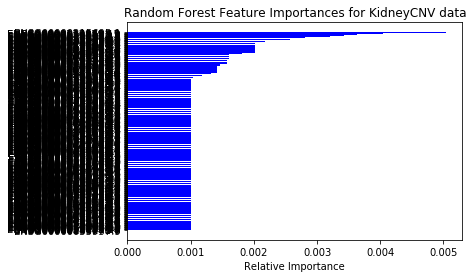

Top 500 features: ['ENSG00000215695.1', 'ENSG00000132879.12', 'ENSG00000116688.15', 'ENSG00000142623.9', 'ENSG00000065526.9', 'ENSG00000120137.6', 'ENSG00000162461.7', 'ENSG00000117115.11', 'ENSG00000179051.12', 'ENSG00000276747.1', 'ENSG00000074964.15', 'ENSG00000175206.9', 'ENSG00000116661.9', 'ENSG00000189337.14', 'ENSG00000162438.10', 'ENSG00000116726.4', 'ENSG00000171729.12', 'ENSG00000215910.6', 'ENSG00000008130.14', 'ENSG00000198160.13', 'ENSG00000198570.5', 'ENSG00000186891.12', 'ENSG00000142657.19', 'ENSG00000010327.9', 'ENSG00000116691.9', 'ENSG00000171819.4', 'ENSG00000117118.8', 'ENSG00000162490.6', 'ENSG00000173369.14', 'ENSG00000070831.14', 'ENSG00000215704.8', 'ENSG00000171824.12', 'ENSG00000163686.12', 'ENSG00000113732.7', 'ENSG00000117298.13', 'ENSG00000163875.14', 'ENSG00000117399.12', 'ENSG00000126062.3', 'ENSG00000162775.13', 'ENSG00000179862.6', 'ENSG00000007968.6', 'ENSG00000144589.19', 'ENSG00000078369.16', 'ENSG00000120937.8', 'ENSG00000142698.13', 'ENSG00000163

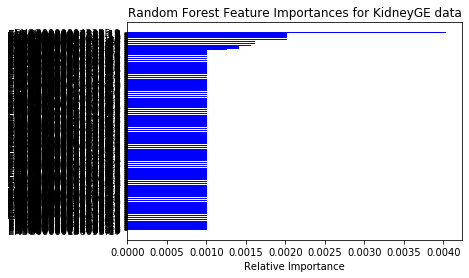

Top 500 features: ['ENSG00000043355.9', 'ENSG00000020181.16', 'ENSG00000027847.12', 'ENSG00000037280.14', 'ENSG00000197406.7', 'ENSG00000069011.14', 'ENSG00000076382.15', 'ENSG00000105732.11', 'ENSG00000006530.14', 'ENSG00000185829.14', 'ENSG00000078328.18', 'ENSG00000001617.10', 'ENSG00000034677.10', 'ENSG00000009307.14', 'ENSG00000050030.12', 'ENSG00000167642.11', 'ENSG00000049323.14', 'ENSG00000060069.15', 'ENSG00000188921.13', 'ENSG00000168454.11', 'ENSG00000002745.11', 'ENSG00000050555.16', 'ENSG00000011132.10', 'ENSG00000247844.1', 'ENSG00000092295.10', 'ENSG00000075702.15', 'ENSG00000047617.13', 'ENSG00000184261.4', 'ENSG00000235310.1', 'ENSG00000165695.8', 'ENSG00000063244.11', 'ENSG00000125977.6', 'ENSG00000008128.21', 'ENSG00000014164.6', 'ENSG00000075461.5', 'ENSG00000006125.15', 'ENSG00000074660.14', 'ENSG00000243761.1', 'ENSG00000042781.11', 'ENSG00000039600.9', 'ENSG00000011114.13', 'ENSG00000002079.11', 'ENSG00000004846.15', 'ENSG00000048140.16', 'ENSG00000035403.15', 'E

In [9]:
kidneyCNV_import = run_random_forest(df=kidneyCNV, random_state=42, n_estimators=1000, n_importance=500, name="KidneyCNV")
kidneyGE_import = run_random_forest(df=kidneyGE, random_state=42, n_estimators=1000, n_importance=500, name="KidneyGE")

In [22]:
num_features = [30, 50, 100, 150, 300, 400, 2000000]
# num_features = [30, 50, 100, 150, 200, 300, 400, 500]
for n in num_features:
    intersect = set(kidneyCNV_import[:n]).intersection(set(kidneyGE_import[:n]))
    if len(intersect) >0:
        print("CNV intersection GE : ", intersect)
        break

CNV intersection GE :  {'ENSG00000057468.6'}


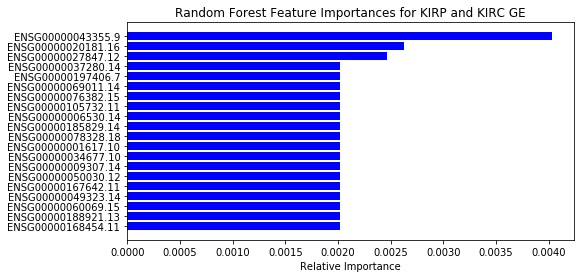

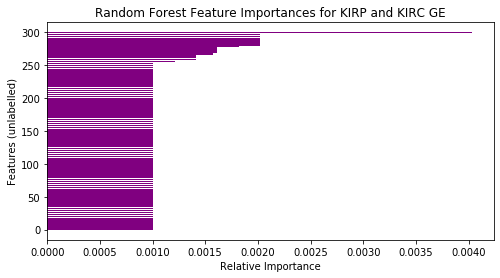

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
features = list(kidneyGE.columns[:-1])

Y = kidneyGE['Target']
X = kidneyGE[features]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 42)
randForest = RandomForestClassifier(n_estimators = 1000, random_state = 42)
randForest.fit(Xtrain,Ytrain)

f_import = randForest.feature_importances_
# top 20 features
# last 20 items in the array
sortedIdx1 = np.argsort(f_import)[-20:]  

fig, ax = plt.subplots(figsize=(8,4))
plt.title('Random Forest Feature Importances for KIRP and KIRC GE')
ax.barh(range(len(sortedIdx1)), f_import[sortedIdx1], color='b', align='center')
plt.yticks(range(len(sortedIdx1)), [features[i] for i in sortedIdx1])
plt.xlabel('Relative Importance')
plt.savefig('KidneyGEtop20.png')
plt.show()

indices1 = np.argsort(f_import)[-300:] 
fig, ax = plt.subplots(figsize=(8,4))
plt.title('Random Forest Feature Importances for KIRP and KIRC GE')
ax.barh(range(len(indices1)), f_import[indices1], color='purple', align='center')
plt.ylabel('Features (unlabelled)')
plt.xlabel('Relative Importance')
plt.savefig('KidneyGEAllFeatsImport.png')
plt.show()

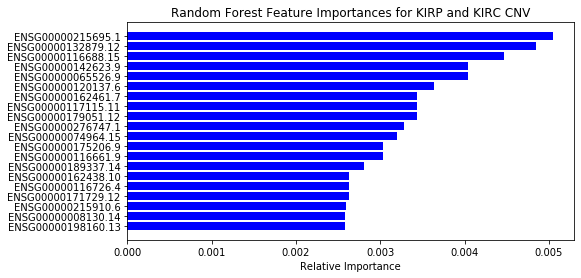

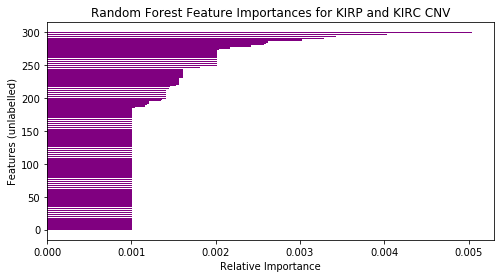

In [27]:
features = list(kidneyCNV.columns[:-1])

Y = kidneyCNV['Target']
X = kidneyCNV[features]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 42)
randForest = RandomForestClassifier(n_estimators = 1000, random_state = 42)
randForest.fit(Xtrain,Ytrain)

f_import = randForest.feature_importances_
# top 20 features
# last 20 items in the array
sortedIdx1 = np.argsort(f_import)[-20:]  

fig, ax = plt.subplots(figsize=(8,4))
plt.title('Random Forest Feature Importances for KIRP and KIRC CNV')
ax.barh(range(len(sortedIdx1)), f_import[sortedIdx1], color='b', align='center')
plt.yticks(range(len(sortedIdx1)), [features[i] for i in sortedIdx1])
plt.xlabel('Relative Importance')
plt.savefig('KidneyCNVtop20.png')
plt.show()

indices1 = np.argsort(f_import)[-300:] 
fig, ax = plt.subplots(figsize=(8,4))
plt.title('Random Forest Feature Importances for KIRP and KIRC CNV')
ax.barh(range(len(indices1)), f_import[indices1], color='purple', align='center')
plt.ylabel('Features (unlabelled)')
plt.xlabel('Relative Importance')
plt.savefig('KidneyCNVAllFeatsImport.png')
plt.show()

In [26]:
lungkidneyCNV = pd.concat([principalCompLUAD,principalCompLUSC, principalCompKIRP,principalCompKIRC])
lungkidneyGE = pd.concat([princCompLUAD,princCompLUSC, princCompKIRP,princCompKIRC])

Training Features Shape: (16, 19729)
Training Labels Shape: (16,)
Testing Features Shape: (4, 19729)
Testing Labels Shape: (4,)
Index(['PC-4', 'PC-1', 'PC-2', 'PC-4', 'PC-4', 'PC-2', 'PC-4', 'PC-3', 'PC-5',
       'PC-5', 'PC-5', 'PC-3', 'PC-3', 'PC-1', 'PC-5', 'PC-2'],
      dtype='object')
Training the model


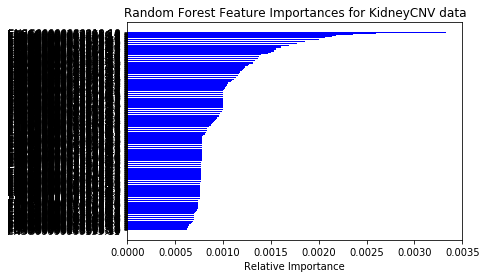

Top 500 features: ['ENSG00000080910.10', 'ENSG00000162591.14', 'ENSG00000144468.15', 'ENSG00000233954.6', 'ENSG00000162460.6', 'ENSG00000204219.8', 'ENSG00000134376.13', 'ENSG00000162461.7', 'ENSG00000067066.15', 'ENSG00000276747.1', 'ENSG00000171729.12', 'ENSG00000178171.9', 'ENSG00000090104.10', 'ENSG00000115109.12', 'ENSG00000174529.7', 'ENSG00000154027.17', 'ENSG00000131238.15', 'ENSG00000188389.9', 'ENSG00000116698.19', 'ENSG00000168264.9', 'ENSG00000142634.11', 'ENSG00000115596.3', 'ENSG00000115541.9', 'ENSG00000158552.11', 'ENSG00000187957.7', 'ENSG00000011021.20', 'ENSG00000055070.15', 'ENSG00000183891.5', 'ENSG00000215704.8', 'ENSG00000168582.4', 'ENSG00000085831.14', 'ENSG00000280298.1', 'ENSG00000085832.15', 'ENSG00000162520.13', 'ENSG00000116771.5', 'ENSG00000256671.5', 'ENSG00000135931.16', 'ENSG00000117394.18', 'ENSG00000138376.9', 'ENSG00000151687.13', 'ENSG00000170502.11', 'ENSG00000196090.11', 'ENSG00000226124.5', 'ENSG00000171872.4', 'ENSG00000186790.5', 'ENSG00000171

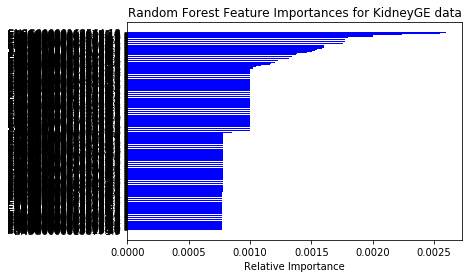

Top 500 features: ['ENSG00000163564.13', 'ENSG00000198785.4', 'ENSG00000005007.11', 'ENSG00000162676.10', 'ENSG00000140450.8', 'ENSG00000101152.9', 'ENSG00000136379.10', 'ENSG00000064763.9', 'ENSG00000107554.14', 'ENSG00000167916.4', 'ENSG00000163508.11', 'ENSG00000185313.6', 'ENSG00000110031.11', 'ENSG00000092377.12', 'ENSG00000233029.3', 'ENSG00000211787.1', 'ENSG00000134504.11', 'ENSG00000100147.12', 'ENSG00000198168.7', 'ENSG00000170396.7', 'ENSG00000113263.11', 'ENSG00000119723.14', 'ENSG00000273216.1', 'ENSG00000257454.1', 'ENSG00000101911.11', 'ENSG00000105737.8', 'ENSG00000054116.10', 'ENSG00000235621.7', 'ENSG00000134256.11', 'ENSG00000239961.2', 'ENSG00000168918.12', 'ENSG00000226995.6', 'ENSG00000232310.5', 'ENSG00000201302.1', 'ENSG00000085741.11', 'ENSG00000186049.7', 'ENSG00000188807.11', 'ENSG00000211809.2', 'ENSG00000104341.15', 'ENSG00000148120.13', 'ENSG00000198879.10', 'ENSG00000236790.4', 'ENSG00000168350.7', 'ENSG00000009830.10', 'ENSG00000205794.4', 'ENSG000002728

In [28]:
lungkidneyCNV_import = run_random_forest(df=lungkidneyCNV, random_state=42, n_estimators=1000, n_importance=500, name="KidneyCNV")
lungkidneyGE_import = run_random_forest(df=lungkidneyGE, random_state=42, n_estimators=1000, n_importance=500, name="KidneyGE")

In [37]:
num_features = [30, 50, 100, 250]
for n in num_features:
    intersect = set(lungkidneyCNV_import[:n]).intersection(set(lungkidneyGE_import[:n]))
    if len(intersect) >0:
        print("CNV intersection GE : ", intersect)
        break

CNV intersection GE :  {'ENSG00000168918.12'}


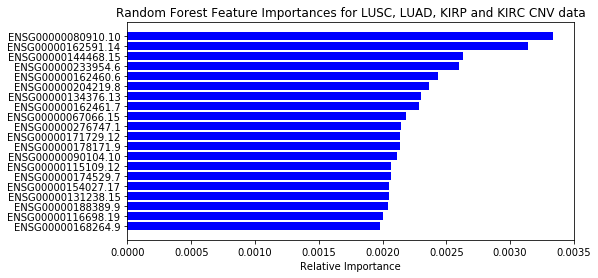

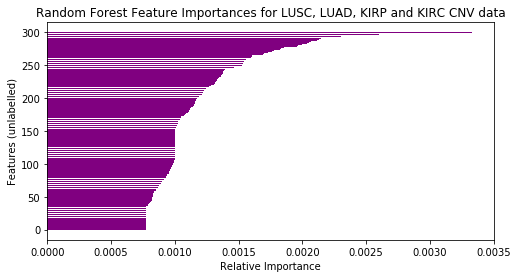

In [28]:
features = list(lungkidneyCNV.columns[:-1])

Y = lungkidneyCNV['Target']
X = lungkidneyCNV[features]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 42)
randForest = RandomForestClassifier(n_estimators = 1000, random_state = 42)
randForest.fit(Xtrain,Ytrain)

f_import = randForest.feature_importances_
# top 20 features
# last 20 items in the array
sortedIdx1 = np.argsort(f_import)[-20:]  

fig, ax = plt.subplots(figsize=(8,4))
plt.title('Random Forest Feature Importances for LUSC, LUAD, KIRP and KIRC CNV data')
ax.barh(range(len(sortedIdx1)), f_import[sortedIdx1], color='b', align='center')
plt.yticks(range(len(sortedIdx1)), [features[i] for i in sortedIdx1])
plt.xlabel('Relative Importance')
plt.savefig('LungKidneyCNVtop20.png')
plt.show()

indices1 = np.argsort(f_import)[-300:] 
fig, ax = plt.subplots(figsize=(8,4))
plt.title('Random Forest Feature Importances for LUSC, LUAD, KIRP and KIRC CNV data')
ax.barh(range(len(indices1)), f_import[indices1], color='purple', align='center')
plt.ylabel('Features (unlabelled)')
plt.xlabel('Relative Importance')
plt.savefig('LungKidneyCNVAllFeatsImport.png')
plt.show()

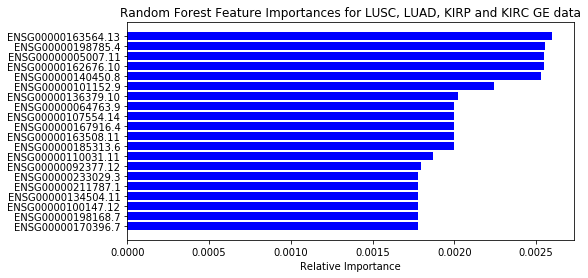

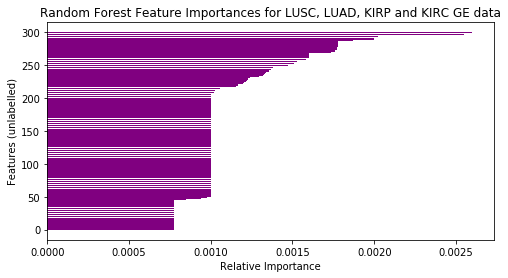

In [29]:
features = list(lungkidneyGE.columns[:-1])

Y = lungkidneyGE['Target']
X = lungkidneyGE[features]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 42)
randForest = RandomForestClassifier(n_estimators = 1000, random_state = 42)
randForest.fit(Xtrain,Ytrain)

f_import = randForest.feature_importances_
# top 20 features
# last 20 items in the array
sortedIdx1 = np.argsort(f_import)[-20:]  

fig, ax = plt.subplots(figsize=(8,4))
plt.title('Random Forest Feature Importances for LUSC, LUAD, KIRP and KIRC GE data')
ax.barh(range(len(sortedIdx1)), f_import[sortedIdx1], color='b', align='center')
plt.yticks(range(len(sortedIdx1)), [features[i] for i in sortedIdx1])
plt.xlabel('Relative Importance')
plt.savefig('LungKidneyGEtop20.png')
plt.show()

indices1 = np.argsort(f_import)[-300:] 
fig, ax = plt.subplots(figsize=(8,4))
plt.title('Random Forest Feature Importances for LUSC, LUAD, KIRP and KIRC GE data')
ax.barh(range(len(indices1)), f_import[indices1], color='purple', align='center')
plt.ylabel('Features (unlabelled)')
plt.xlabel('Relative Importance')
plt.savefig('LungKidneyGEAllFeatsImport.png')
plt.show()